In [15]:
import pandas as pd
from matplotlib import pyplot as plt

In [169]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [170]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [171]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Text(0, 0.5, 'Salary')

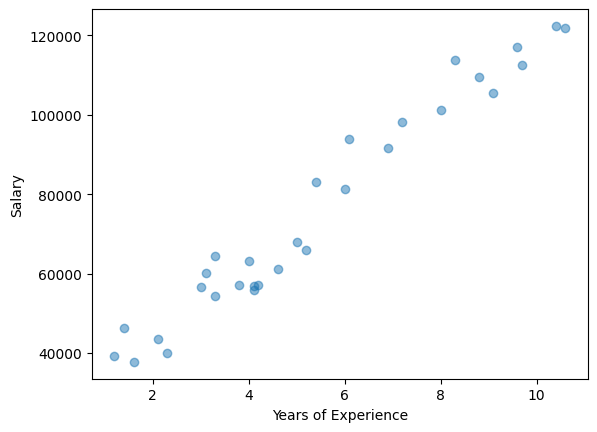

In [172]:
plt.scatter(df.YearsExperience, df.Salary, alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [173]:
def estimated_salary(w, x, b):
    return w * x + b

In [174]:
w = 10
b = 60000

In [175]:
print(estimated_salary(w, 4, b))

60040


In [176]:
experience = df.YearsExperience
salary = estimated_salary(w, experience, b)
print(salary)

0     60012.0
1     60014.0
2     60016.0
3     60021.0
4     60023.0
5     60030.0
6     60031.0
7     60033.0
8     60033.0
9     60038.0
10    60040.0
11    60041.0
12    60041.0
13    60042.0
14    60046.0
15    60050.0
16    60052.0
17    60054.0
18    60060.0
19    60061.0
20    60069.0
21    60072.0
22    60080.0
23    60083.0
24    60088.0
25    60091.0
26    60096.0
27    60097.0
28    60104.0
29    60106.0
Name: YearsExperience, dtype: float64


Text(0, 0.5, 'Salary')

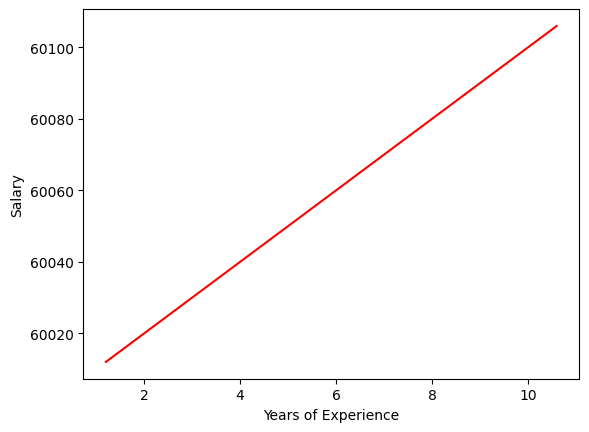

In [177]:
plt.plot(experience, salary, 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

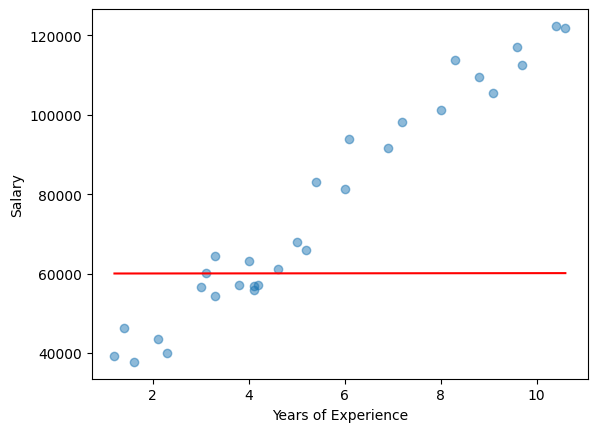

In [178]:
plt.plot(experience, salary, 'r')

plt.scatter(df.YearsExperience, df.Salary, alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [179]:
def try_parameters(w, b):
    sal = df.Salary
    exp = df.YearsExperience

    est_sal = estimated_salary(w, exp, b)

    plt.plot(exp, est_sal, 'r')

    plt.scatter(exp, sal, alpha=0.5)
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend(["Estimated", "Actual"])

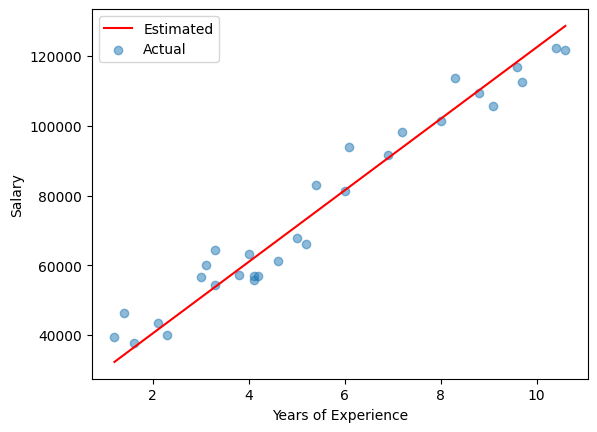

In [186]:
try_parameters(10250, 20000)

In [193]:
print(estimated_salary(10250, 0, 20000))

20000
